In [43]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [44]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [45]:
import tensorflow
tensorflow.__version__

'2.17.0'

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
x_train.shape

(50000, 32, 32, 3)

In [48]:
x_test.shape

(10000, 32, 32, 3)

In [49]:
from collections import Counter

# Assume y_train has shape (50000, 1)
y_train_flat = y_train.flatten()  # This will convert it to shape (50000,)

# Now you can use Counter to count occurrences of each class
class_counts = Counter(y_train_flat)
print(class_counts)


Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})


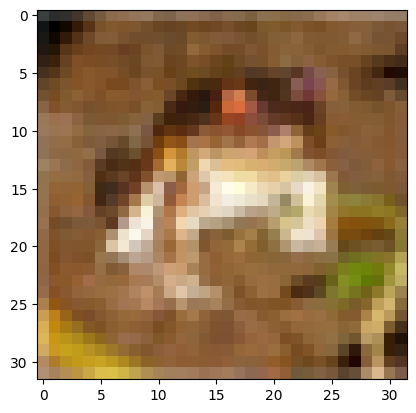

In [50]:
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [51]:
y_train[0]

array([6], dtype=uint8)

In [52]:
y_train.shape


(50000, 1)

In [53]:
from tensorflow.keras.utils import to_categorical
y_train_ohe = to_categorical(y_train, num_classes=10)
y_train_ohe.shape

(50000, 10)

In [54]:
# alternative way to do one hot encoding
import tensorflow as tf
y_test_ohe = tf.one_hot(y_test, depth=10)
y_test_ohe.shape

TensorShape([10000, 1, 10])

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [56]:
print(f'Train set shape is: {x_train.shape}')
print(f'Test set shape is: {x_test.shape}')

Train set shape is: (50000, 32, 32, 3)
Test set shape is: (10000, 32, 32, 3)


In [57]:
# Flatten images and normalize for FCN
x_train_ann = x_train.reshape(50000, 32*32*3)
x_train_ann = x_train_ann / 255.0

x_test_ann = x_test.reshape(10000, 32*32*3)
x_test_ann = x_test_ann / 255.0

In [58]:
# One-hot encode the labels
y_train_ohe = keras.utils.to_categorical(y_train, num_classes=10)  # One-hot encoding
y_test_ohe = keras.utils.to_categorical(y_test, num_classes=10)

In [59]:
# Constructing the ANN model
ann_model = keras.Sequential(name="ann_cifar10")
ann_model.add(layers.Input(shape=(3072,)))
ann_model.add(layers.Dense(units=512, activation='relu'))
ann_model.add(layers.Dense(units=10, activation='softmax'))

In [60]:
# Model summary
ann_model.summary()

Model: "ann_cifar10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Compile the model
ann_model.compile(optimizer='rmsprop',  # Using rmsprop optimizer
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [62]:
from tensorflow.keras.callbacks import ModelCheckpoint
modelcheckpoint = ModelCheckpoint(
    filepath="ANN_cifar10_best.keras",
    save_best_only=True,
    monitor="val_loss",
)

callback_list = [modelcheckpoint]

In [63]:
# Train the model
history = ann_model.fit(
    x_train_ann,
    y_train_ohe,
    validation_data=(x_test_ann, y_test_ohe),
    epochs=20,  # Experiment with number of epochs
    batch_size=128,
    callbacks=callback_list
)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.2114 - loss: 3.0428 - val_accuracy: 0.2949 - val_loss: 1.9486
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.3476 - loss: 1.8269 - val_accuracy: 0.3680 - val_loss: 1.7695
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.3833 - loss: 1.7273 - val_accuracy: 0.3873 - val_loss: 1.6967
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.4076 - loss: 1.6662 - val_accuracy: 0.3945 - val_loss: 1.6942
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.4252 - loss: 1.6270 - val_accuracy: 0.4312 - val_loss: 1.6017
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.4380 - loss: 1.5902 - val_accuracy: 0.4323 - val_loss: 1.6050
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.4483 - loss: 1.5584 - val_accuracy: 0.3994 - val_loss: 1.6938
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.4579 - loss: 1.5431 - 

In [64]:
test_model = keras.models.load_model("ANN_cifar10_best.keras")
test_model.evaluate(x_test_ann, y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4888 - loss: 1.4479


[1.4554295539855957, 0.49239999055862427]

The model achieved an accuracy of about  49.0%% and a loss of 1.450 on the test set. While this may be expected for a simple ANN on a complex dataset like CIFAR-10, a more sophisticated model, like a Convolutional Neural Network (CNN),

In [65]:
# reshaping
x_train.shape

(50000, 32, 32, 3)

In [66]:
# Flatten images and normalize for FCN
x_train_ann = x_train.reshape(50000, 32*32*3)
x_train_ann = x_train_ann / 255.0

x_test_ann = x_test.reshape(10000, 32*32*3)
x_test_ann = x_test_ann / 255.0

In [67]:
x_train.shape

(50000, 32, 32, 3)

In [68]:
x_test.shape

(10000, 32, 32, 3)

CNN MODEL

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [70]:

def CNN_builder():
    inputs= keras.Input(shape=(32, 32, 3), name='Input layer')
    x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(inputs)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
    x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
    x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
    x = layers.Flatten(name="flattening_layer")(x)

    outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs= inputs , outputs=outputs, name='my_first_CNN_model')

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [71]:
model = CNN_builder()
model.summary()

Model: "my_first_CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_1 (Conv2D)                │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_3 (Conv2D)                │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flattening_layer (Flatten)           │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,738 (444.29 KB)

 Trainable params: 113,738 (444.29 KB)

 Non-trainable params: 0 (0.00 B)

Model Fit

In [72]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="CNN_cifar10_best.keras",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

In [73]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)


In [74]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback_list = [modelcheckpoint, early_stopping]

In [75]:
history = model.fit(
    x_train,
    y_train_ohe,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test_ohe),
    callbacks=callback_list)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 70s 176ms/step - accuracy: 0.2600 - loss: 6.3171 - val_accuracy: 0.4943 - val_loss: 1.3992
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 170ms/step - accuracy: 0.5299 - loss: 1.3533 - val_accuracy: 0.5157 - val_loss: 1.4404
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 170ms/step - accuracy: 0.6088 - loss: 1.1437 - val_accuracy: 0.6139 - val_loss: 1.1340
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 170ms/step - accuracy: 0.6670 - loss: 0.9807 - val_accuracy: 0.6054 - val_loss: 1.1864
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 174ms/step - accuracy: 0.6985 - loss: 0.8799 - val_accuracy: 0.5689 - val_loss: 1.4039
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 67s 171ms/step - accuracy: 0.7283 - loss: 0.8049 - val_accuracy: 0.6442 - val_loss: 1.1851
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 67s 172ms/step - accuracy: 0.7568 - loss: 0.7174 - val_accuracy: 0.6273 - val_loss: 1.3195
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 168ms/step - accuracy: 0.7775 - loss: 0

In [77]:
test_model = keras.models.load_model("CNN_cifar10_best.keras")
test_model.evaluate(x_test, y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6203 - loss: 1.1368


[1.1340159177780151, 0.6139000058174133]

In [80]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_ohe)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6203 - loss: 1.1368
Test accuracy: 61.39%


In [81]:
model.metrics_names

['loss', 'compile_metrics']

In [82]:
metrics = pd.DataFrame(history.history)

In [83]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.35868,2.619842,0.4943,1.399178
1,0.54416,1.321237,0.5157,1.440436
2,0.61632,1.130752,0.6139,1.134015
3,0.66182,0.998497,0.6054,1.186445
4,0.69404,0.895804,0.5689,1.403867


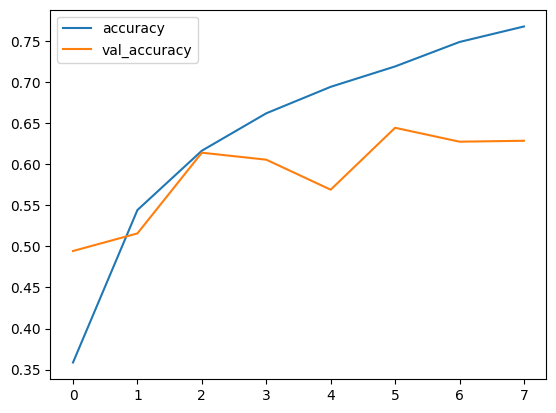

In [84]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

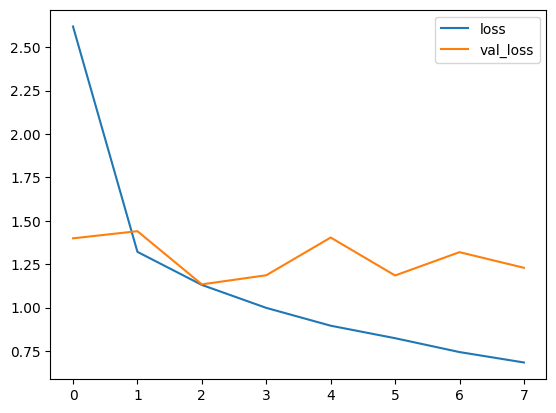

In [85]:
metrics[['loss','val_loss']].plot()
plt.show()

In [109]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        #layers.RandomRotation(0.1),
        #layers.RandomZoom(0.2),
    ]
)

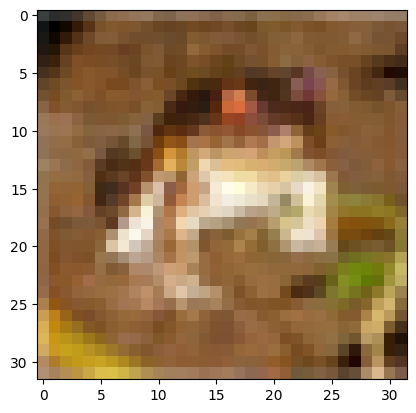

In [130]:
plt.imshow(x_train[0].reshape(32,32,3))
plt.show()

In [131]:
image = x_train[0]
image.shape

(32, 32, 3)

In [135]:
# Assuming 'image' is a NumPy array with shape (32, 32, 3)
augmented_image = data_augmentation(tf.expand_dims(image, axis=0))  # Add batch dimension
print(augmented_image.numpy().shape)  # Should print (1, 32, 32, 3)


(1, 32, 32, 3)


In [137]:
augmented_image = data_augmentation(tf.expand_dims(image, axis=0))  # Add batch dimension
print(augmented_image.numpy().shape)  # Should print (1, 32, 32, 3)

(1, 32, 32, 3)


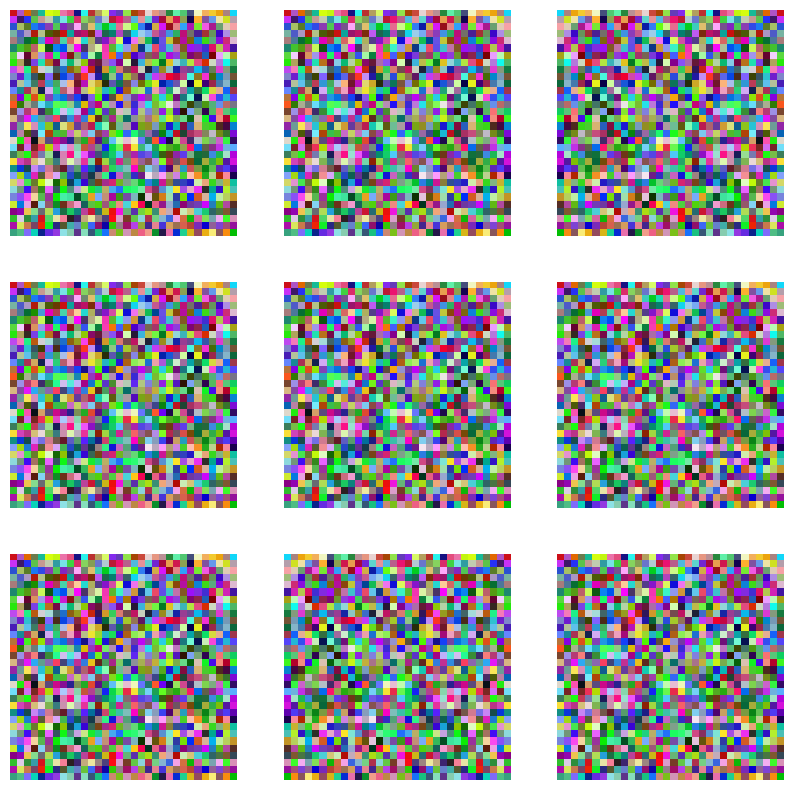

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming 'image' is a single image with shape (32, 32, 3)
# Replace this with your actual image loading logic
image = np.random.rand(32, 32, 3)  # Example image for demonstration

# Define the data augmentation layer
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        # You can add more augmentations here
    ]
)

plt.figure(figsize=(10, 10))
for i in range(9):
    # Add a batch dimension and apply augmentation
    augmented_image = data_augmentation(tf.expand_dims(image, axis=0))  # Shape becomes (1, 32, 32, 3)

    ax = plt.subplot(3, 3, i + 1)

    # Reshape back to (32, 32, 3) to visualize
    plt.imshow(augmented_image.numpy().reshape(32, 32, 3))
    plt.axis("off")

plt.show()


In [143]:
augmented_images = data_augmentation(x_train)
augmented_images.shape

TensorShape([50000, 32, 32, 3])

In [144]:
augmented_images = tf.expand_dims(augmented_images, axis=-1)
augmented_images.shape

TensorShape([50000, 32, 32, 3, 1])

In [145]:
augmented_images = tf.squeeze(augmented_images,axis=-1)
augmented_images.shape

TensorShape([50000, 32, 32, 3])

In [151]:
def CNN_builder_augmented():
    # Set the input shape for grayscale images
    inputs = keras.Input(shape=(32, 32, 1), name='Input layer')

    # Apply data augmentation
    augmented_images = data_augmentation(inputs)

    # Normalize the data
    augmented_images = layers.Rescaling(1. / 255)(augmented_images)

    # Convolutional layers
    augmented_images = layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', name="conv_layer_1")(augmented_images)
    augmented_images = layers.MaxPool2D(pool_size=2, name="pooling_1")(augmented_images)
    augmented_images = layers.Conv2D(filters=64, kernel_size=3, activation='relu', name="conv_layer_2")(augmented_images)
    augmented_images = layers.MaxPool2D(pool_size=2, name="pooling_2")(augmented_images)
    augmented_images = layers.Conv2D(filters=128, kernel_size=3, activation='relu', name="conv_layer_3")(augmented_images)

    # Flatten and dropout layers
    augmented_images = layers.Flatten(name="flattening_layer")(augmented_images)
    augmented_images = layers.Dropout(0.5)(augmented_images)

    # Output layer
    outputs = layers.Dense(units=10, activation='softmax', name='output_layer')(augmented_images)

    # Create the model
    model = keras.Model(inputs=inputs, outputs=outputs, name='CNN_augmented_model')

    # Compile the model
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [152]:
model_augmented = CNN_builder_augmented()
model_augmented.summary()

Model: "CNN_augmented_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input layer (InputLayer)             │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_6 (Sequential)            │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_1 (Conv2D)                │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_3 (Conv2D)                │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flattening_layer (Flatten)           │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,162 (442.04 KB)

 Trainable params: 113,162 (442.04 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
def CNN_builder_augmented():
    inputs = keras.Input(shape=(32, 32, 3), name='Input layer')  # Change to 3 channels for RGB
    augmented_images = data_augmentation(inputs)
    augmented_images = layers.Rescaling(1./255)(augmented_images)  # Normalize the data

    # No need to reshape since the input is already in the correct format
    augmented_images = layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', name="conv_layer_1")(augmented_images)
    augmented_images = layers.MaxPool2D(pool_size=2, name="pooling_1")(augmented_images)
    augmented_images = layers.Conv2D(filters=64, kernel_size=3, activation='relu', name="conv_layer_2")(augmented_images)
    augmented_images = layers.MaxPool2D(pool_size=2, name="pooling_2")(augmented_images)
    augmented_images = layers.Conv2D(filters=128, kernel_size=3, activation='relu', name="conv_layer_3")(augmented_images)
    augmented_images = layers.Flatten(name="flattening_layer")(augmented_images)
    augmented_images = layers.Dropout(0.5)(augmented_images)

    outputs = layers.Dense(units=10, activation='softmax', name='output_layer')(augmented_images)

    model = keras.Model(inputs=inputs, outputs=outputs, name='CNN_augmented_model')

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and summarize the model
model_augmented = CNN_builder_augmented()
model_augmented.summary()

# Fit the model
history = model_augmented.fit(
    x_train,
    y_train_ohe,
    epochs=20,  # You can adjust the number of epochs
    batch_size=64,  # You can adjust the batch size as needed
    validation_data=(x_test, y_test_ohe),
    callbacks=callback_list  # Add any callbacks if you have them
)

# Evaluate the model on the test set
test_loss, test_accuracy = model_augmented.evaluate(x_test, y_test_ohe)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Model: "CNN_augmented_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_6 (Sequential)            │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_1 (Conv2D)                │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_3 (Conv2D)                │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flattening_layer (Flatten)           │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,738 (444.29 KB)

 Trainable params: 113,738 (444.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 98ms/step - accuracy: 0.2969 - loss: 1.8980 - val_accuracy: 0.5136 - val_loss: 1.3572
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 95ms/step - accuracy: 0.5183 - loss: 1.3624 - val_accuracy: 0.5936 - val_loss: 1.1521
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 100ms/step - accuracy: 0.5863 - loss: 1.1709 - val_accuracy: 0.6290 - val_loss: 1.0480
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 96ms/step - accuracy: 0.6317 - loss: 1.0603 - val_accuracy: 0.6668 - val_loss: 0.9600
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 97ms/step - accuracy: 0.6575 - loss: 0.9840 - val_accuracy: 0.6259 - val_loss: 1.0699
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - accuracy: 0.6809 - loss: 0.9251 - val_accuracy: 0.6550 - val_loss: 1.0302
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.6936 - loss: 0.8829 - val_accuracy: 0.6608 - val_loss: 0.9702
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - accuracy: 0.7073 - loss: 0.8473 -

In [158]:
model_augmented.evaluate(x_test, y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7699 - loss: 0.6917


[0.7031716108322144, 0.7641000151634216]

In [160]:
metrics = pd.DataFrame(history.history)

In [161]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.38800,1.680930,0.5136,1.357221
1,0.53680,1.312449,0.5936,1.152125
2,0.59760,1.143828,0.6290,1.047995
3,0.63862,1.042099,0.6668,0.959960
4,0.66364,0.972230,0.6259,1.069895


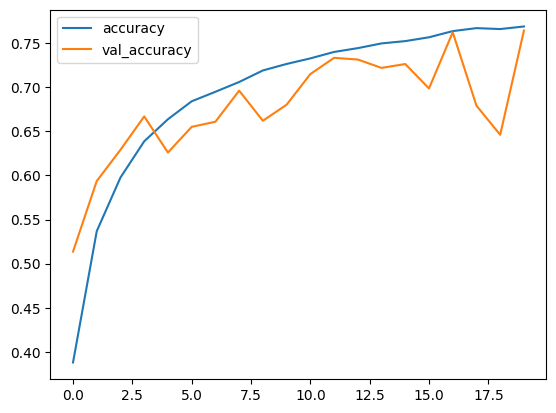

In [162]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

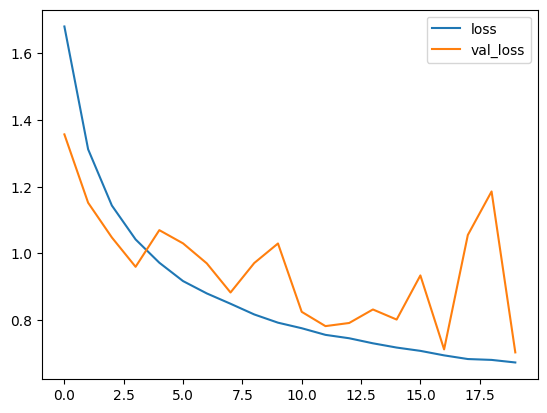

In [163]:
metrics[['loss','val_loss']].plot()
plt.show()

In [167]:
winning_model = keras.models.load_model("CNN_cifar10_best.keras")

In [168]:
# Print the model summary
winning_model.summary()


Model: "CNN_augmented_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_6 (Sequential)            │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_1 (Conv2D)                │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_3 (Conv2D)                │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flattening_layer (Flatten)           │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,478 (888.59 KB)

 Trainable params: 113,738 (444.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 113,740 (444.30 KB)

Kernel Size Contribution:
3
×
3
×
64
×
128
=
73
,
728
3×3×64×128=73,728
Biases for Each Filter:
128
128
Adding them together:

Total Parameters
=
73
,
728
+
128
=
73
,
856
Total Parameters=73,728+128=73,856

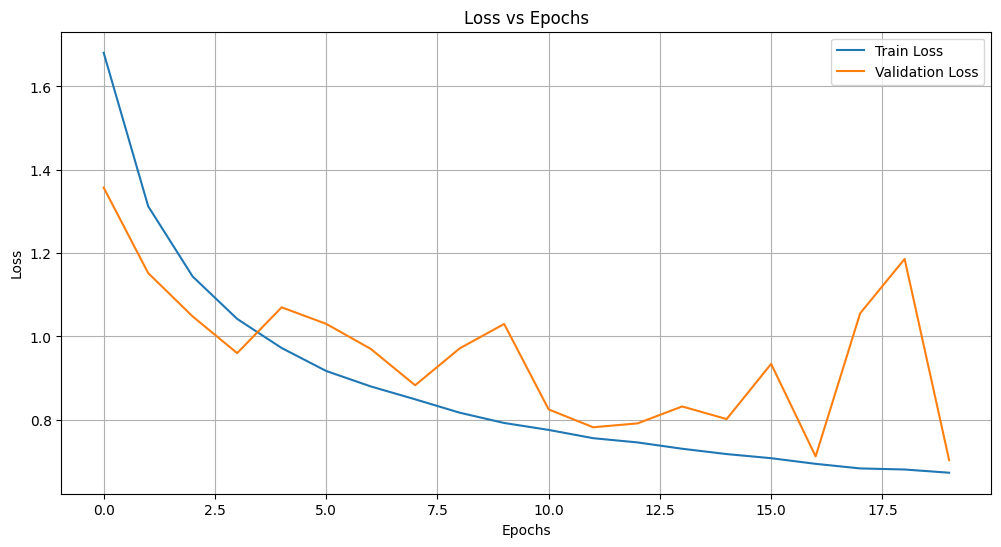

In [170]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model.fit()
# history = model_augmented.fit(...)

# Plotting the loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [172]:
# Finding the epoch number where validation loss starts to increase
val_loss = history.history['val_loss']
train_loss = history.history['loss']

# Check for overfitting
for i in range(1, len(val_loss)):
    if val_loss[i] > val_loss[i - 1] and train_loss[i] < train_loss[i - 1]:
        print(f'Model starts overfitting at epoch {i + 1}.')
        break


Model starts overfitting at epoch 5.


In [173]:
# Assuming x_test and y_test are your test data and true labels
predictions = np.argmax(winning_model.predict(x_test), axis=-1)
true_labels = np.argmax(y_test_ohe, axis=-1)  # If your true labels are one-hot encoded


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [175]:
# Generate classification report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
report = classification_report(true_labels, predictions, output_dict=True)
print(classification_report(true_labels, predictions))


              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1000
           1       0.92      0.83      0.87      1000
           2       0.86      0.53      0.65      1000
           3       0.60      0.59      0.59      1000
           4       0.70      0.79      0.74      1000
           5       0.66      0.70      0.68      1000
           6       0.84      0.80      0.82      1000
           7       0.75      0.87      0.80      1000
           8       0.84      0.89      0.86      1000
           9       0.75      0.90      0.82      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



In [176]:
# Extract F1 scores from the report
f1_scores = {label: metrics['f1-score'] for label, metrics in report.items() if label != 'accuracy'}

# Find the class with the lowest F1 score
lowest_f1_class = min(f1_scores, key=f1_scores.get)
lowest_f1_value = f1_scores[lowest_f1_class]

print(f'The class with the lowest F1 score is: {lowest_f1_class} with a score of {lowest_f1_value:.4f}')


The class with the lowest F1 score is: 3 with a score of 0.5926


In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [178]:
# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)


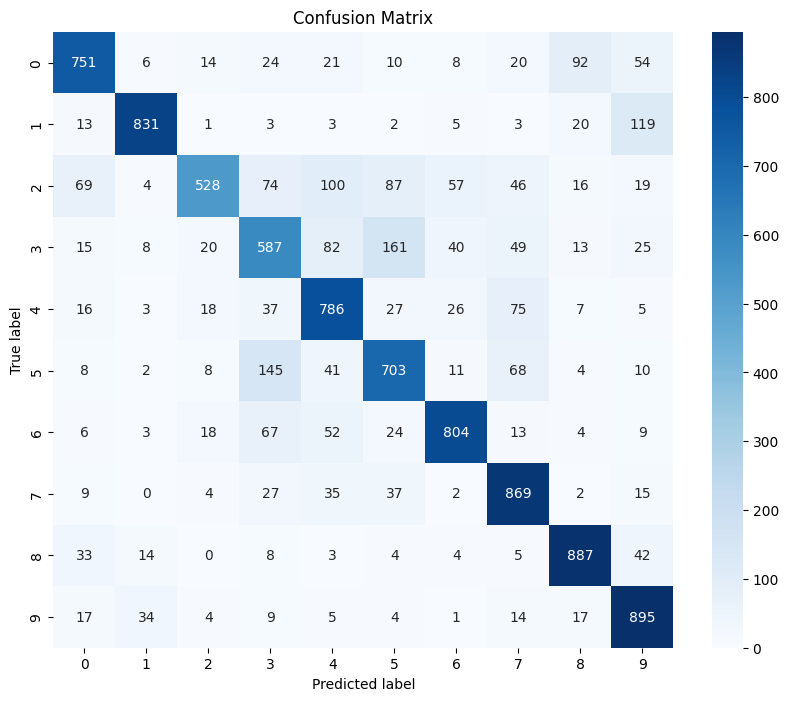

In [179]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [180]:
# Extract the classes that are frequently confused with each other
confused_pairs = []

for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        if i != j and conf_matrix[i][j] > 10:  # Adjust the threshold as necessary
            confused_pairs.append((i, j, conf_matrix[i][j]))

# Display confused pairs
print("Classes that the model has difficulty distinguishing:")
for pair in confused_pairs:
    print(f'Class {pair[0]} and Class {pair[1]} with {pair[2]} misclassifications.')


Classes that the model has difficulty distinguishing:
Class 0 and Class 2 with 14 misclassifications.
Class 0 and Class 3 with 24 misclassifications.
Class 0 and Class 4 with 21 misclassifications.
Class 0 and Class 7 with 20 misclassifications.
Class 0 and Class 8 with 92 misclassifications.
Class 0 and Class 9 with 54 misclassifications.
Class 1 and Class 0 with 13 misclassifications.
Class 1 and Class 8 with 20 misclassifications.
Class 1 and Class 9 with 119 misclassifications.
Class 2 and Class 0 with 69 misclassifications.
Class 2 and Class 3 with 74 misclassifications.
Class 2 and Class 4 with 100 misclassifications.
Class 2 and Class 5 with 87 misclassifications.
Class 2 and Class 6 with 57 misclassifications.
Class 2 and Class 7 with 46 misclassifications.
Class 2 and Class 8 with 16 misclassifications.
Class 2 and Class 9 with 19 misclassifications.
Class 3 and Class 0 with 15 misclassifications.
Class 3 and Class 2 with 20 misclassifications.
Class 3 and Class 4 with 82 misc

In [182]:
import numpy as np

# Get predictions and the misclassified indices
predictions = winning_model.predict(x_test)  # Assuming x_test is your test dataset
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_ohe, axis=1)  # Assuming y_test_ohe is your one-hot encoded test labels

# Identify misclassified samples
misclassified_indices = np.where(predicted_classes != true_classes)[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


In [183]:
# Get the first 6 misclassified samples
first_6_misclassified_indices = misclassified_indices[:6]
misclassified_images = x_test[first_6_misclassified_indices]
misclassified_true_labels = true_classes[first_6_misclassified_indices]
misclassified_predicted_labels = predicted_classes[first_6_misclassified_indices]


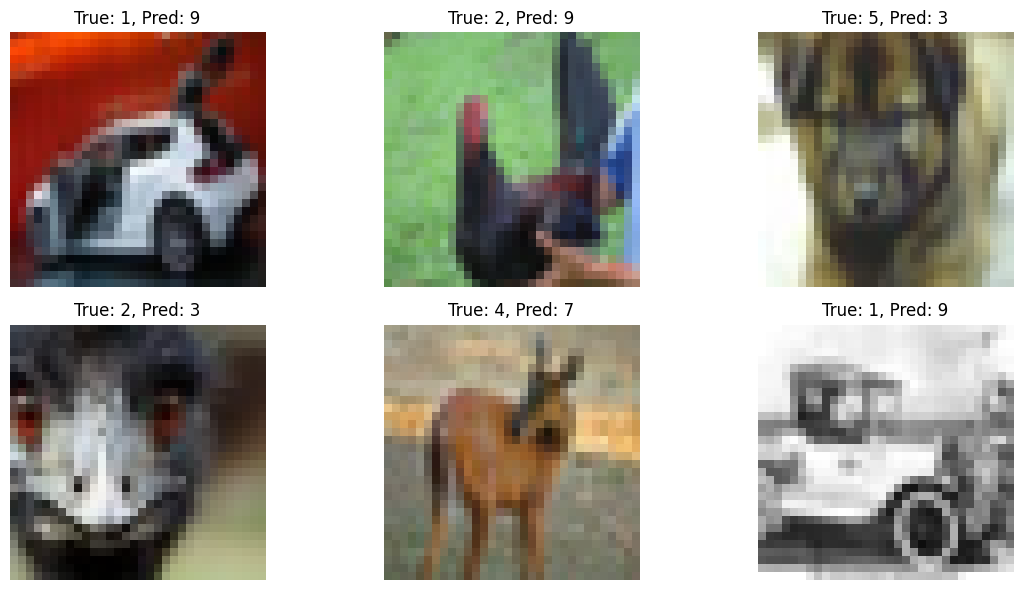

In [184]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the misclassified images
for i, index in enumerate(first_6_misclassified_indices):
    plt.subplot(2, 3, i + 1)
    plt.imshow(misclassified_images[i].reshape(32, 32, 3))  # Adjust reshape according to your image shape
    plt.title(f'True: {misclassified_true_labels[i]}, Pred: {misclassified_predicted_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Well, I was able to predict two of the images one is dog and the other is car